# Importing modules and data

In [117]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.neighbors import BallTree

In [118]:
train_set_ind = pd.read_csv("../Downloads/train_set_ind.csv")
test_set_ind = pd.read_csv("../Downloads/test_set_ind.csv")
train_set_val = pd.read_csv("../Downloads/train_set_val.csv")
test_set_val = pd.read_csv("../Downloads/test_set_val.csv")

subset_013_ind = pd.read_csv("../Downloads/subset1_ind.csv")
subset_03_ind = pd.read_csv("../Downloads/subset2_ind.csv")
subset_3_ind = pd.read_csv("../Downloads/subset3_ind.csv")
subset_013_val = pd.read_csv("../Downloads/subset1_val.csv")
subset_03_val = pd.read_csv("../Downloads/subset2_val.csv")
subset_3_val = pd.read_csv("../Downloads/subset3_val.csv")

In [119]:
train_set_ind = train_set_ind.drop(['Unnamed: 0'], axis=1)
test_set_ind = test_set_ind.drop(['Unnamed: 0'], axis=1)
train_set_val = train_set_val.drop(['Unnamed: 0'], axis=1)
test_set_val = test_set_val.drop(['Unnamed: 0'], axis=1)

subset_013_ind = subset_013_ind.drop(['Unnamed: 0'], axis=1)
subset_03_ind = subset_03_ind.drop(['Unnamed: 0'], axis=1)
subset_3_ind = subset_3_ind.drop(['Unnamed: 0'], axis=1)
subset_013_val = subset_013_val.drop(['Unnamed: 0'], axis=1)
subset_03_val = subset_03_val.drop(['Unnamed: 0'], axis=1)
subset_3_val = subset_3_val.drop(['Unnamed: 0'], axis=1)

# Transform back to categorical

In [120]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

In [121]:
for col in train_set_ind.columns:
    for i in category_columns:
        if col == i:
            train_set_ind[col] = train_set_ind[col].astype('category')

In [122]:
for col in test_set_ind.columns:
    for i in category_columns:
        if col == i:
            test_set_ind[col] = test_set_ind[col].astype('category')

In [123]:
for col in train_set_val.columns:
    for i in category_columns:
        if col == i:
            train_set_val[col] = train_set_val[col].astype('category')

In [124]:
for col in test_set_val.columns:
    for i in category_columns:
        if col == i:
            test_set_val[col] = test_set_val[col].astype('category')

In [125]:
for col in subset_013_ind.columns:
    for i in category_columns:
        if col == i:
            subset_013_ind[col] = subset_013_ind[col].astype('category')

In [126]:
for col in subset_03_ind.columns:
    for i in category_columns:
        if col == i:
            subset_03_ind[col] = subset_03_ind[col].astype('category')

In [127]:
for col in subset_3_ind.columns:
    for i in category_columns:
        if col == i:
            subset_3_ind[col] = subset_3_ind[col].astype('category')

In [128]:
for col in subset_013_val.columns:
    for i in category_columns:
        if col == i:
            subset_013_val[col] = subset_013_val[col].astype('category')

In [129]:
for col in subset_03_val.columns:
    for i in category_columns:
        if col == i:
            subset_03_val[col] = subset_03_val[col].astype('category')

In [130]:
for col in subset_3_val.columns:
    for i in category_columns:
        if col == i:
            subset_3_val[col] = subset_3_val[col].astype('category')

__Splitting into dependent and independent variables__

_Individual:_

In [131]:
X_train_ind = train_set_ind.iloc[:, :-1].values

In [132]:
X_test_ind = test_set_ind.iloc[:, :-1].values

In [133]:
y_train_ind = train_set_ind.iloc[:,-1].values

In [134]:
y_test_ind = test_set_ind.iloc[:,-1].values

_Valence:_

In [135]:
X_train_val= train_set_val.iloc[:, :-1].values

In [136]:
X_test_val = test_set_val.iloc[:, :-1].values

In [137]:
y_train_val = train_set_val.iloc[:,-1].values

In [138]:
y_test_val = test_set_val.iloc[:,-1].values

_For smaller but more complete dataframes:_

In [139]:
X_subset_013_ind = subset_013_ind.iloc[:, :-1].values
y_subset_013_ind = subset_013_ind.iloc[:,-1].values
X_subset_013_val = subset_013_val.iloc[:, :-1].values
y_subset_013_val = subset_013_val.iloc[:,-1].values

In [140]:
X_subset_03_ind = subset_03_ind.iloc[:, :-1].values
y_subset_03_ind = subset_03_ind.iloc[:,-1].values
X_subset_03_val = subset_03_val.iloc[:, :-1].values
y_subset_03_val = subset_03_val.iloc[:,-1].values

In [141]:
X_subset_3_ind = subset_3_ind.iloc[:, :-1].values
y_subset_3_ind = subset_3_ind.iloc[:,-1].values
X_subset_3_val = subset_3_val.iloc[:, :-1].values
y_subset_3_val = subset_3_val.iloc[:,-1].values

&nbsp;

# 1. K-Nearest Neighbours

In [142]:
def plot(y_true, y_pred):
    labels = unique_labels(y_true)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                        columns=column, index=indices)
    return table

In [143]:
def plot_error(X_train,y_train,X_test,y_test):
    error_rate = []
    for i in range(1,80):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(10,6))

    plt.plot(range(1,80),error_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=5)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

&nbsp;

__Computing optimum error rates__

Minimum error:- 0.7847726661285983 at K = 66


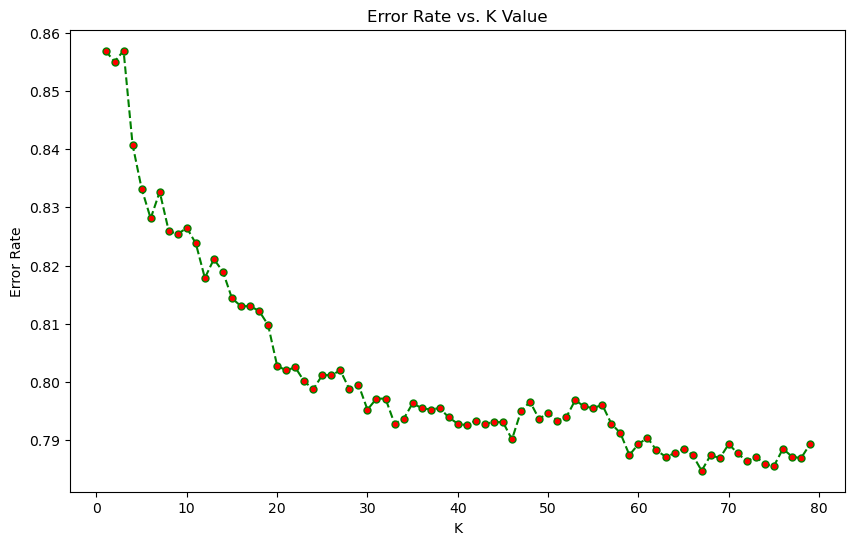

In [144]:
plot_error(X_train_ind,y_train_ind,X_test_ind,y_test_ind)

Minimum error:- 0.7828894269572235 at K = 71


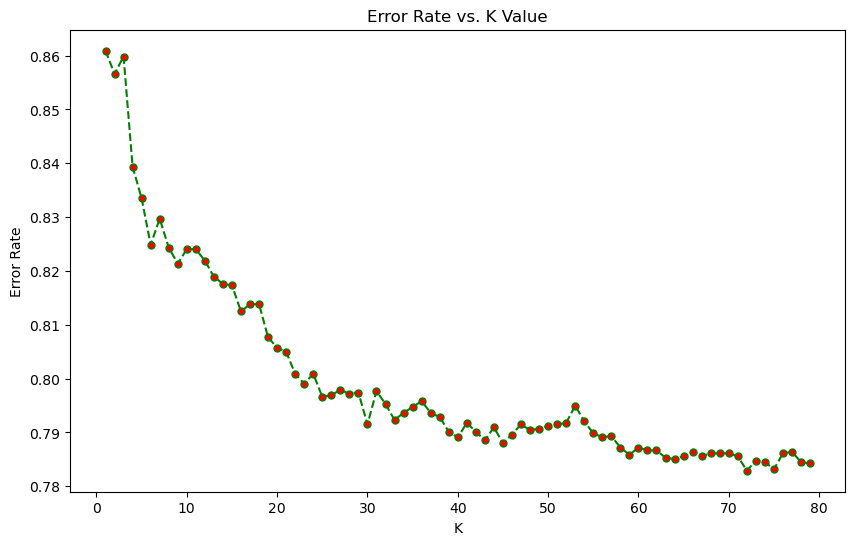

In [145]:
plot_error(X_train_val,y_train_val,X_test_val,y_test_val)

&nbsp;

### All datapoints:

__individual__

_with jaccard:_

In [146]:
np.random.seed(1903)
knn_clf_ind = KNeighborsClassifier(n_neighbors=66, metric='jaccard')
knn_clf_ind.fit(X_train_ind, y_train_ind)
pred_ind_jac =  knn_clf_ind.predict(X_test_ind)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [147]:
plot(y_test_ind, pred_ind_jac)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,128,0,5,0,5,97,0,0,11,133,0,0
Actual CU,33,0,4,1,1,41,0,0,6,54,0,0
Actual D66,115,0,25,0,7,128,0,0,35,272,0,0
Actual GL,45,0,12,2,3,50,0,0,22,85,0,0
Actual PVV,64,0,2,2,11,84,0,0,28,110,0,0
Actual PvdA,107,0,5,0,9,87,0,0,12,107,0,0
Actual PvdD,33,0,4,3,2,60,0,0,15,55,0,0
Actual SGP,10,0,1,0,0,15,0,0,1,29,0,0
Actual SP,63,0,2,0,16,77,0,0,27,75,0,0
Actual VVD,142,0,20,1,13,165,0,0,22,418,0,0


In [148]:
print(classification_report(y_test_ind, pred_ind_jac, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.16      0.34      0.21       379
          CU       1.00      0.00      0.00       140
         D66       0.25      0.04      0.07       582
          GL       0.17      0.01      0.02       219
         PVV       0.12      0.04      0.06       301
        PvdA       0.09      0.27      0.14       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.12      0.10      0.11       260
         VVD       0.27      0.54      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.19      3717
   macro avg       0.52      0.11      0.08      3717
weighted avg       0.38      0.19      0.13      3717



&nbsp;

_With Hamming:_

In [149]:
np.random.seed(1904)
knn_clf_ind = KNeighborsClassifier(n_neighbors=66, metric='hamming')
knn_clf_ind.fit(X_train_ind, y_train_ind)
pred_ind_ham =  knn_clf_ind.predict(X_test_ind)

In [150]:
print(classification_report(y_test_ind, pred_ind_ham, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.15      0.41      0.22       379
          CU       1.00      0.00      0.00       140
         D66       0.23      0.03      0.06       582
          GL       0.00      0.00      0.00       219
         PVV       0.21      0.05      0.08       301
        PvdA       0.10      0.25      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.12      0.06      0.08       260
         VVD       0.27      0.55      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.19      3717
   macro avg       0.51      0.11      0.08      3717
weighted avg       0.38      0.19      0.13      3717



&nbsp;

&nbsp;

__valence__

_With Jaccard:_

In [151]:
np.random.seed(1901)
knn_clf_val = KNeighborsClassifier(n_neighbors=71, metric='jaccard')
knn_clf_val.fit(X_train_val, y_train_val)
pred_val_jac =  knn_clf_val.predict(X_test_val)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [152]:
print(classification_report(y_test_val, pred_val_jac, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.14      0.01      0.01       379
          CU       1.00      0.00      0.00       140
         D66       0.14      0.00      0.00       582
          GL       1.00      0.00      0.00       219
         PVV       0.00      0.00      0.00       301
        PvdA       0.10      0.61      0.17       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.25      0.01      0.01       260
         VVD       0.24      0.50      0.32       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.16      3717
   macro avg       0.57      0.09      0.04      3717
weighted avg       0.41      0.16      0.08      3717



&nbsp;

_With Hamming:_

In [153]:
np.random.seed(1902)
knn_clf_val = KNeighborsClassifier(n_neighbors=71, metric='hamming')
knn_clf_val.fit(X_train_val, y_train_val)
pred_val_ham =  knn_clf_val.predict(X_test_val)

In [154]:
print(classification_report(y_test_val, pred_val_ham, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.16      0.07      0.10       379
          CU       1.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       1.00      0.00      0.00       219
         PVV       0.00      0.00      0.00       301
        PvdA       0.09      0.42      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.07      0.00      0.01       260
         VVD       0.25      0.65      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.18      3717
   macro avg       0.55      0.10      0.05      3717
weighted avg       0.37      0.18      0.10      3717



&nbsp;

&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say" answers:

__Individual__

In [155]:
np.random.seed(1908)
knn_clf_ind2 = KNeighborsClassifier(n_neighbors=66, metric='jaccard')
knn_clf_ind2.fit(X_subset_013_ind,y_subset_013_ind)
pred_ind_ham3 =  knn_clf_ind2.predict(X_test_ind)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [156]:
plot(y_test_ind, pred_ind_ham3)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,133,0,7,1,1,75,0,0,12,150,0,0
Actual CU,41,0,3,0,0,23,0,0,7,66,0,0
Actual D66,126,0,33,2,3,94,0,0,35,289,0,0
Actual GL,53,0,8,4,1,46,0,0,17,90,0,0
Actual PVV,69,0,3,3,9,63,0,0,37,117,0,0
Actual PvdA,113,0,5,0,4,79,0,0,12,114,0,0
Actual PvdD,41,0,4,2,3,47,0,0,12,63,0,0
Actual SGP,7,0,2,0,0,13,0,0,1,33,0,0
Actual SP,73,0,2,0,5,64,0,0,26,90,0,0
Actual VVD,157,0,18,2,9,128,0,0,20,447,0,0


In [157]:
print(classification_report(y_test_ind, pred_ind_ham3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.15      0.35      0.21       379
          CU       1.00      0.00      0.00       140
         D66       0.29      0.06      0.10       582
          GL       0.22      0.02      0.03       219
         PVV       0.19      0.03      0.05       301
        PvdA       0.11      0.24      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.12      0.10      0.11       260
         VVD       0.26      0.57      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.20      3717
   macro avg       0.53      0.11      0.08      3717
weighted avg       0.40      0.20      0.14      3717



&nbsp;

__Valence:__

In [158]:
np.random.seed(1909)
knn_clf_val2 = KNeighborsClassifier(n_neighbors=71, metric='hamming')
knn_clf_val2.fit(X_subset_013_val,y_subset_013_val)
pred_val_ham3 =  knn_clf_val2.predict(X_test_val)

In [159]:
plot(y_test_val, pred_val_ham3)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,23,0,1,0,0,160,0,0,0,195,0,0
Actual CU,4,0,0,0,0,54,0,0,0,82,0,0
Actual D66,26,0,0,0,0,196,0,0,4,356,0,0
Actual GL,14,0,1,0,0,111,0,0,1,92,0,0
Actual PVV,11,0,1,0,0,160,0,0,1,128,0,0
Actual PvdA,22,0,0,0,0,144,0,0,1,160,0,0
Actual PvdD,8,0,0,0,0,86,0,0,1,77,0,0
Actual SGP,6,0,1,0,0,15,0,0,0,34,0,0
Actual SP,14,0,0,0,0,133,0,0,1,112,0,0
Actual VVD,26,0,3,0,0,244,0,0,2,506,0,0


In [160]:
print(classification_report(y_test_val, pred_val_ham3, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.14      0.06      0.08       379
          CU       1.00      0.00      0.00       140
         D66       0.00      0.00      0.00       582
          GL       1.00      0.00      0.00       219
         PVV       0.00      0.00      0.00       301
        PvdA       0.09      0.44      0.16       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.08      0.00      0.01       260
         VVD       0.25      0.65      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.18      3717
   macro avg       0.55      0.10      0.05      3717
weighted avg       0.37      0.18      0.10      3717



&nbsp;

&nbsp;


### Datapoints excluding "I prefer not to say" & "I don't know" answers:

__Individual__

In [161]:
np.random.seed(1908)
knn_clf_ind3 = KNeighborsClassifier(n_neighbors=66, metric='jaccard')
knn_clf_ind3.fit(X_subset_03_ind,y_subset_03_ind)
pred_ind_ham4 =  knn_clf_ind3.predict(X_test_ind)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [162]:
plot(y_test_ind, pred_ind_ham4)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,40,0,0,0,0,126,0,0,5,208,0,0
Actual CU,9,0,0,0,0,44,0,0,4,83,0,0
Actual D66,46,0,6,0,2,200,0,0,10,318,0,0
Actual GL,23,0,2,0,1,75,0,0,6,112,0,0
Actual PVV,17,1,2,1,0,122,0,0,18,140,0,0
Actual PvdA,35,0,1,1,0,109,0,0,7,174,0,0
Actual PvdD,11,0,1,1,0,76,0,0,7,76,0,0
Actual SGP,6,0,0,0,0,16,0,0,0,34,0,0
Actual SP,18,0,0,0,0,110,0,0,16,116,0,0
Actual VVD,59,0,1,0,0,261,0,0,8,452,0,0


In [163]:
print(classification_report(y_test_ind, pred_ind_ham4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.13      0.11      0.12       379
          CU       0.00      0.00      0.00       140
         D66       0.33      0.01      0.02       582
          GL       0.00      0.00      0.00       219
         PVV       0.00      0.00      0.00       301
        PvdA       0.08      0.33      0.13       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.17      0.06      0.09       260
         VVD       0.23      0.58      0.33       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.17      3717
   macro avg       0.41      0.09      0.06      3717
weighted avg       0.33      0.17      0.10      3717



&nbsp;

__Valence__

In [164]:
np.random.seed(1909)
knn_clf_val3 = KNeighborsClassifier(n_neighbors=71, metric='hamming')
knn_clf_val3.fit(X_subset_03_val,y_subset_03_val)
pred_val_ham4 =  knn_clf_val3.predict(X_test_val)

In [165]:
plot(y_test_val, pred_val_ham4)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,35,0,2,0,0,138,0,0,0,204,0,0
Actual CU,10,0,0,0,0,48,0,0,1,81,0,0
Actual D66,30,0,1,0,0,166,0,0,0,385,0,0
Actual GL,22,0,0,0,0,92,0,0,1,104,0,0
Actual PVV,17,0,0,0,0,141,0,0,0,143,0,0
Actual PvdA,21,0,0,0,0,137,0,0,1,168,0,0
Actual PvdD,9,0,1,0,0,69,0,0,0,93,0,0
Actual SGP,8,0,1,0,0,13,0,0,0,34,0,0
Actual SP,20,0,0,0,0,119,0,0,0,121,0,0
Actual VVD,34,0,0,0,0,227,0,0,0,520,0,0


In [166]:
print(classification_report(y_test_val, pred_val_ham4, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.16      0.09      0.12       379
          CU       1.00      0.00      0.00       140
         D66       0.20      0.00      0.00       582
          GL       1.00      0.00      0.00       219
         PVV       1.00      0.00      0.00       301
        PvdA       0.10      0.42      0.16       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.00      0.00      0.00       260
         VVD       0.24      0.67      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.19      3717
   macro avg       0.64      0.10      0.05      3717
weighted avg       0.48      0.19      0.10      3717



&nbsp;

&nbsp;

### Datapoints excluding "I prefer not to say", "I don't know" & NaN answers:

__Individual__

In [167]:
np.random.seed(1908)
knn_clf_ind4 = KNeighborsClassifier(n_neighbors=66, metric='jaccard')
knn_clf_ind4.fit(X_subset_3_ind,y_subset_3_ind)
pred_ind_ham5 =  knn_clf_ind4.predict(X_test_ind)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [168]:
plot(y_test_ind, pred_ind_ham5)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,143,0,1,0,20,108,0,0,3,104,0,0
Actual CU,36,0,0,0,4,45,0,0,1,54,0,0
Actual D66,127,0,1,0,35,198,0,0,14,207,0,0
Actual GL,57,0,0,0,14,93,0,0,2,53,0,0
Actual PVV,72,0,0,0,27,111,0,0,13,78,0,0
Actual PvdA,119,0,0,0,18,95,0,0,6,89,0,0
Actual PvdD,44,0,1,1,7,69,0,0,6,44,0,0
Actual SGP,9,0,0,0,4,19,0,0,0,24,0,0
Actual SP,70,0,0,0,20,98,0,0,13,59,0,0
Actual VVD,160,0,0,0,79,225,0,0,6,311,0,0


In [169]:
print(classification_report(y_test_ind, pred_ind_ham5, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.16      0.38      0.22       379
          CU       1.00      0.00      0.00       140
         D66       0.33      0.00      0.00       582
          GL       0.00      0.00      0.00       219
         PVV       0.10      0.09      0.10       301
        PvdA       0.08      0.29      0.12       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       0.17      0.05      0.08       260
         VVD       0.26      0.40      0.31       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.16      3717
   macro avg       0.51      0.10      0.07      3717
weighted avg       0.38      0.16      0.11      3717



&nbsp;

__Valence__

In [170]:
np.random.seed(1909)
knn_clf_val4 = KNeighborsClassifier(n_neighbors=71, metric='hamming')
knn_clf_val4.fit(X_subset_3_val,y_subset_3_val)
pred_val_ham5 =  knn_clf_val4.predict(X_test_val)

In [171]:
plot(y_test_val, pred_val_ham5)

,Predicted CDA,Predicted CU,Predicted D66,Predicted GL,Predicted PVV,Predicted PvdA,Predicted PvdD,Predicted SGP,Predicted SP,Predicted VVD,Predicted blank,Predicted other
Actual CDA,39,0,0,0,0,151,0,0,0,189,0,0
Actual CU,6,0,0,0,0,56,0,0,0,78,0,0
Actual D66,36,0,0,0,0,186,0,0,0,360,0,0
Actual GL,25,0,0,0,0,91,0,0,0,103,0,0
Actual PVV,22,0,0,0,0,148,0,0,0,131,0,0
Actual PvdA,20,0,0,0,0,138,0,0,0,169,0,0
Actual PvdD,9,0,0,0,0,81,0,0,0,82,0,0
Actual SGP,3,0,0,0,0,22,0,0,0,31,0,0
Actual SP,20,0,0,0,0,131,0,0,0,109,0,0
Actual VVD,34,0,0,0,0,247,0,0,0,500,0,0


In [172]:
print(classification_report(y_test_val, pred_val_ham5, zero_division=1))

              precision    recall  f1-score   support

         CDA       0.17      0.10      0.13       379
          CU       1.00      0.00      0.00       140
         D66       1.00      0.00      0.00       582
          GL       1.00      0.00      0.00       219
         PVV       1.00      0.00      0.00       301
        PvdA       0.09      0.42      0.15       327
        PvdD       1.00      0.00      0.00       172
         SGP       1.00      0.00      0.00        56
          SP       1.00      0.00      0.00       260
         VVD       0.25      0.64      0.36       781
       blank       1.00      0.00      0.00        13
       other       1.00      0.00      0.00       487

    accuracy                           0.18      3717
   macro avg       0.79      0.10      0.05      3717
weighted avg       0.68      0.18      0.10      3717

